### 1 Reproduce Taylor Series in Python from Python for Undergraduate  Engineers for the functions in the Taylor Series figure above.

La serie de tailor para $e^x$ es:

$$ 
e^{x} \approx \sum^{\infty}_{n = 0} \frac{x^n}{n!} \approx 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...
$$

Con los primeros 4 terminos, tenemos que


In [1]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print("taylor:", e_to_2)
print("Valor:", math.exp(2))

Para tener mas precision, se utiliza un ciclo

In [2]:
x = 2
e_to_2 = 0
for i in range(10):
    e_to_2 += x**i/math.factorial(i)
    
print("taylor 10:", e_to_2)
print("Valor:", math.exp(2))

Se crea una funcion para poder aproximar $e^x$ con n terminos y cualquier x.

In [3]:
def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    
    return e_approx

In [4]:
out = func_e(2,10)
print("taylor(2, 10):", out)

Es importante conocer el error de la aproximacion con el valor real

In [5]:
x = 5
for i in range(1,11):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

Para conocer cuantas iteraciones son requeridas para obtener un error < 1 se utiliza un break 

In [6]:
x = 5
for i in range(1,20):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    if e_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

La serie de tailor para $\cos{x}$ es:

$$ 
\cos{x} \approx \sum^{\infty}_{n = 0} (-1)^n \frac{x^{2n}}{2n!} \approx 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!} - \frac{x^10}{10!} + ...
$$

La funcion para la aproximacion sera la siguiente

In [7]:
def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

In [8]:
angle_rad = (math.radians(45))
out = func_cos(angle_rad,5)
print("taylor(45, 5):",out)

Graficar la diferencia de la aproximacion de taylor y el valor real

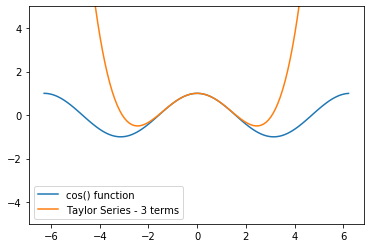

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)
t_cos = [func_cos(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-5,5])
ax.legend(['cos() function','Taylor Series - 3 terms'])

plt.show()

Con un ciclo se pueden ver varias aproximaciones facilmente

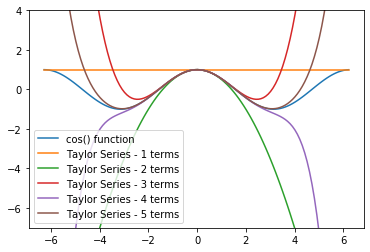

In [10]:
angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

### 2 Reproduce Taylor Series Expansion with Python from Data Science Fabirc for the functions in the Taylor Series figure above.

La serie de taylor se puede generalizar de la siguiente manera:

$$
\sum^{\infty}_{n = 0} \frac{F ^ {n} (a)}{n!} * (x - a)^n
$$

Donde $F ^ {n} (a)$ es la n-sima derivada de la funcion.

Sympy proporciona una funcion que retorna esta serie

In [11]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [12]:
# Define symbol
x = Symbol('x')

In [13]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [14]:
print('sin(x) =', taylor(sin(x), 0, 4))

print('cos(x) =', taylor(cos(x), 0, 4))

print('e(x) =', taylor(exp(x), 0, 4))

sin(x) = -x**3/6 + x
cos(x) = 1 - x**2/2
e(x) = x**3/6 + x**2/2 + x + 1


Si se evaluan esas funciones en x = 1

In [15]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

print('cos(1) =', taylor(cos(x), 0, 4).subs(x,1))

print('e(1) =', taylor(exp(x), 0, 4).subs(x,1))

sin(1) = 5/6
cos(1) = 1/2
e(1) = 8/3


Finalmente se visualizaran los resultados

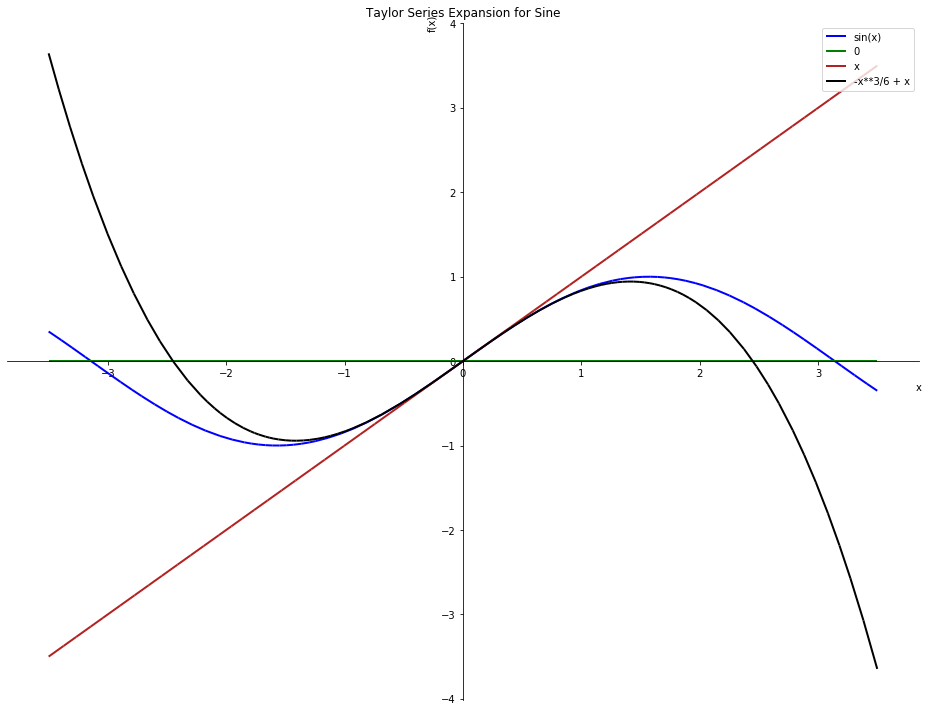

In [16]:
# This will plot sine and its Taylor approximations

p = plot(sin(x),taylor(sin(x),0,1),taylor(sin(x),0,3),taylor(sin(x),0,5),
         (x,-3.5,3.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Sine'
p.show()

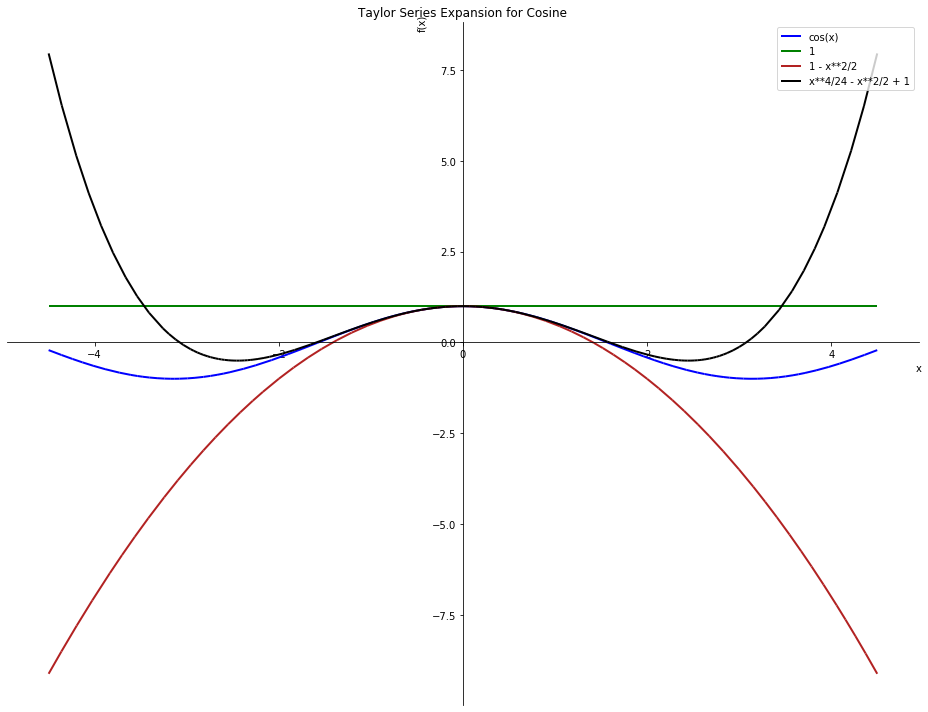

In [17]:
# This will plot cosine and its Taylor approximations

p = plot(cos(x),taylor(cos(x),0,2),taylor(cos(x),0,4),taylor(cos(x),0,6),
         (x,-4.5,4.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Cosine'
p.show()

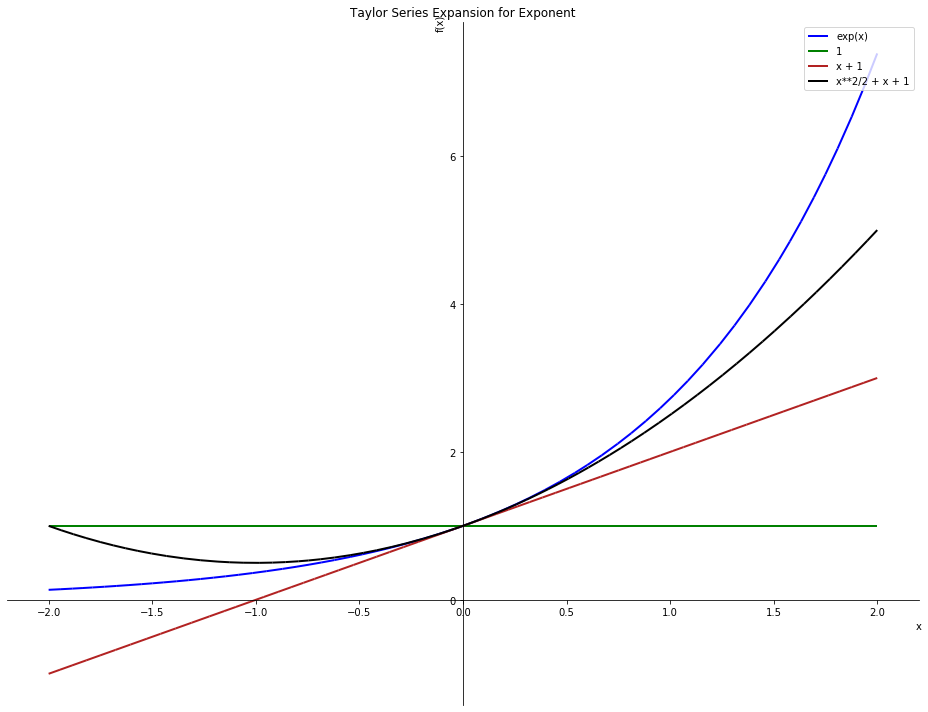

In [18]:
# This will plot exponent and its Taylor approximations

p = plot(exp(x),taylor(exp(x),0,1),taylor(exp(x),0,2),taylor(exp(x),0,3),
         (x,-2,2),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Exponent'
p.show()